<a href="https://colab.research.google.com/github/Duarbert/SAD_DuarteSantos/blob/master/TPC5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



</br></br>

# Sistemas de Apoio à Decisão
#### TPC 5 - PARTE 1 DO TRABALHO FINAL (15 dias)

---------------


##### Com base no seu dataset (Determinado para a sua resolução do Trabalho final)

- Catalogar o dataset quanto a
    - Dimensionalidade
    - Esparsidade
    - Resolução
    - Tamanho


- Catalogar todos as features (Máx 50), quanto a:
    - valores de valores médios, variâncias,histogramas (crie um módulo que faça isto por si);
    - Tipo (contínuo, discreto ou binário)   
    - Analise NaN's (ou Nulls) e Outliers
    - Analise os resultados
    - Quais não fazem sentido em termos do problema que pretende resolver;
    - Que outras features poderia utilizar para enriquecer a informação do seu problema;
    - Perceba se deve ou não fazer encoding ou one hot encoding para cada feature discreta;
    - Faça uma matriz de correlação entre as features usando ```dataframe.corr()```;



- Analise em termos estatísticos a Label/target que tem para já como problema.

---

No final, faça um pequeno texto relatando o dataset que está a utilzar, recorrendo à informação que obteve nas perguntas anteriores;


#Definição

Este dataset tem como objectivo classificar uma dada instância de um empregado de uma empresa como potêncial candidato a sair da empresa por variadíssimas razões.

*Attrition, in Human Resource terminology, refers to the phenomenon of the employees leaving the company. Attrition in a company is usually measured with a metric called attrition rate, which simply measures the no of employees moving out of the company (voluntary resigning or laid off by the company). Attrition Rate is also referred as churn rate or turnover.*

*High attrition is a cause of concern for a company as it presents a cost to the company. The company loses on the amount it spent to recruit and select these employees and to train them for their respective jobs. The company may also have to spend additional money to fill the vacancies left open by these employees. Hence it becomes critical for a company to keep a tab on the attrition rate which down-sizes the employee base.*

**Attrition Rate Formula**

Attrition Rate (%)= (Number of separations/ Number of employees) * 100

*Attrition rate gives an idea as to how many employees are leaving the company at any given time period. It is an important factor as companies have to prepare to start recruiting for the positions which are critical and cannot be left vacant.*

#Dependências#

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Importar os classificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Carregar os Dados#

In [0]:
data = pd.DataFrame(pd.read_csv('/content/gdrive/My Drive/SAD/IBMHR.csv', index_col = 9))

#Informação do Dataset - Raw

In [4]:
print('!!! A feature EmployeeNumber está a ser considerada como índice, pois não há nem faz sentido haver duplicados nesta feature !!!\n')
display(data.head())

pd.options.display.max_columns = None
data.columns = data.columns.str.strip()
print('\n')
data.info()

!!! A feature EmployeeNumber está a ser considerada como índice, pois não há nem faz sentido haver duplicados nesta feature !!!



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate         

#Catalogar o Dataset#

In [5]:
display('Dimensionalidade = O dataset tem ' + str(len(data.columns)) + ' features / colunas')
print('\n')

display('Tamanho(instâcias, features) = ' + str(data.shape))
print('\n')

display('Resolução do datset na seguinte tabela:')
dataRes = pd.DataFrame(pd.read_csv('/content/gdrive/My Drive/SAD/IBMHR_Features - Catalog.csv'))
display(dataRes)

'Dimensionalidade = O dataset tem 34 features / colunas'

'Tamanho(instâcias, features) = (1470, 34)'

'Resolução do datset na seguinte tabela:'

,Feature,Type,Classification,Resolution
0,Age,Ordered,Valid,Int
1,Attrition,Binary,Valid,Yes / No
2,BusinessTravel,Tipified,Valid,"Travel_Rarely, Travel_Frequently, Non-Travel"
3,DailyRate,Ordered - Cont,Valid,Float
4,Department,Tipified,Valid,"Sales, Research & Development, Human Resources"
5,DistanceFromHome,Ordered - Cont,Valid,Float / Miles
6,Education,Ordered - Disc,Valid,"1,2,3,4,5"
7,EducationField,Tipified,Valid,"Life Sciences, Other, Medical, Marketing, Tech..."
8,EmployeeCount,Irrelevant,Irrelevant,Int
9,EmployeeNumber,Ordered - Disc,Index,Int / Unique


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

#Pré-processamento dos Dados

In [0]:
# Remover colunas irrelevantes

data = data.drop(['StandardHours', 'Over18', 'EmployeeCount'], axis=1)

In [0]:
# Transformar valores de Sim e Não por valores inteiros 1 e 0

mapping = {'Yes':1, 'No':0, 'Female':1, 'Male':0}
data = data.replace(mapping)


In [0]:
# One Hot Encoding
aaa = pd.get_dummies(data.BusinessTravel)
bbb = pd.get_dummies(data.Department)
ccc = pd.get_dummies(data.JobRole)
ddd = pd.get_dummies(data.MaritalStatus)
eee = pd.get_dummies(data.EducationField)

values = [data, aaa, bbb, ccc, ddd, eee]

data = pd.concat(values,axis=1, join_axes=[data.index])

# Apagar colunas que foram one hotted

data = data.drop(['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'EducationField'], axis = 1)

In [10]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 50 columns):
Age                          1470 non-null int64
Attrition                    1470 non-null int64
DailyRate                    1470 non-null int64
DistanceFromHome             1470 non-null int64
Education                    1470 non-null int64
EnvironmentSatisfaction      1470 non-null int64
Gender                       1470 non-null int64
HourlyRate                   1470 non-null int64
JobInvolvement               1470 non-null int64
JobLevel                     1470 non-null int64
JobSatisfaction              1470 non-null int64
MonthlyIncome                1470 non-null int64
MonthlyRate                  1470 non-null int64
NumCompaniesWorked           1470 non-null int64
OverTime                     1470 non-null int64
PercentSalaryHike            1470 non-null int64
PerformanceRating            1470 non-null int64
RelationshipSatisfaction     1470 non-null int64
StockOption

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,1,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,49,0,279,8,1,3,0,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,37,1,1373,2,2,4,0,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,33,0,1392,3,4,4,1,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
7,27,0,591,2,1,1,0,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [0]:
#funçao de encode para binarização

# def encode_target(df, target_column):
#    df_mod = df.copy()
#    targets = df_mod[target_column].unique()
#    map_to_int = {name: n for n, name in enumerate(targets)}
#    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

#    return (df_mod, targets)

In [0]:
# df2, targets = encode_target(data, "Attrition")
# print("* df2.head()", df2[["Target", "Attrition"]].head(),
#       sep="\n", end="\n\n")
# print("* df2.tail()", df2[["Target", "Attrition"]].tail(),
#       sep="\n", end="\n\n")
# print("* targets", targets, sep="\n", end="\n\n")

#Análise Estatística de Features#

###Valores Estatísticos

In [11]:
# Easy mode:
# display(data.describe())


# Like a pro
values = [data.mean(), data.var(), data.std()]

result = pd.concat(values,axis=1, join_axes=[data.mean().index])

result.columns = ["Média","Variância","Desvio Padrão"]

result

,Média,Variância,Desvio Padrão
Age,36.923810,8.345505e+01,9.135373
Attrition,0.161224,1.353232e-01,0.367863
DailyRate,802.485714,1.628196e+05,403.509100
DistanceFromHome,9.192517,6.572125e+01,8.106864
Education,2.912925,1.048914e+00,1.024165
EnvironmentSatisfaction,2.721769,1.194829e+00,1.093082
Gender,0.400000,2.401634e-01,0.490065
HourlyRate,65.891156,4.132856e+02,20.329428
JobInvolvement,2.729932,5.063193e-01,0.711561
JobLevel,2.063946,1.225316e+00,1.106940


###Histogramas

'You are about to see data from feature Age'

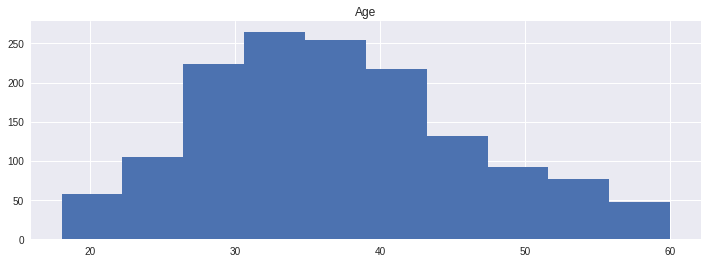

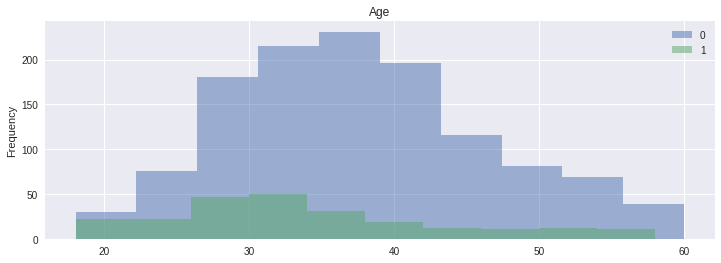

'You are about to see data from feature Attrition'

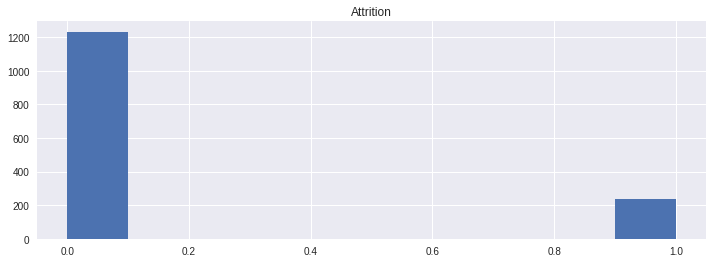

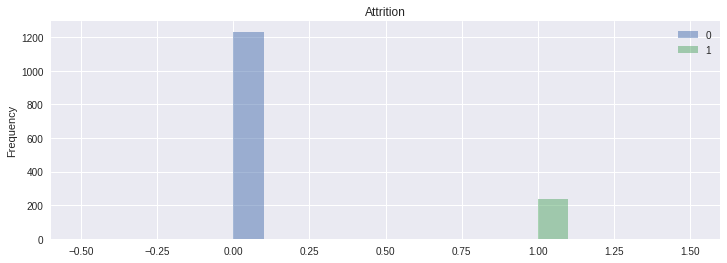

'You are about to see data from feature DailyRate'

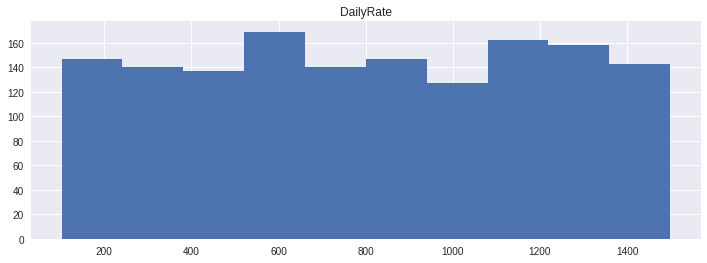

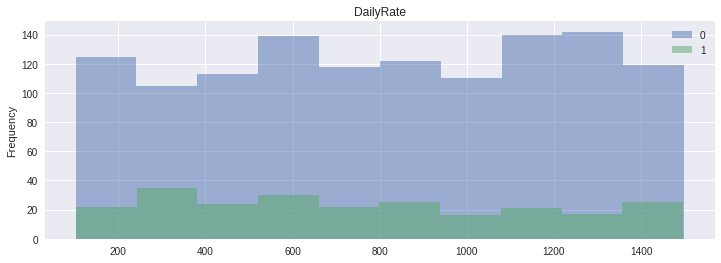

'You are about to see data from feature DistanceFromHome'

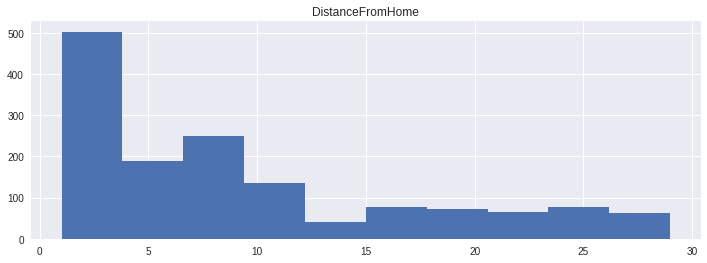

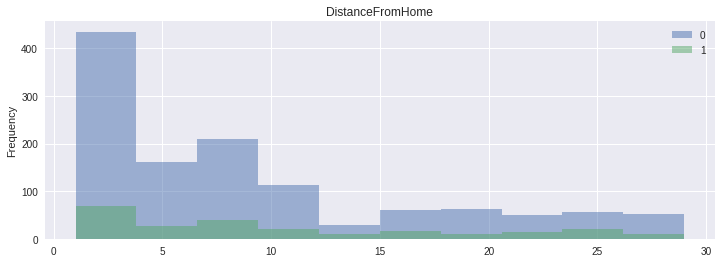

'You are about to see data from feature Education'

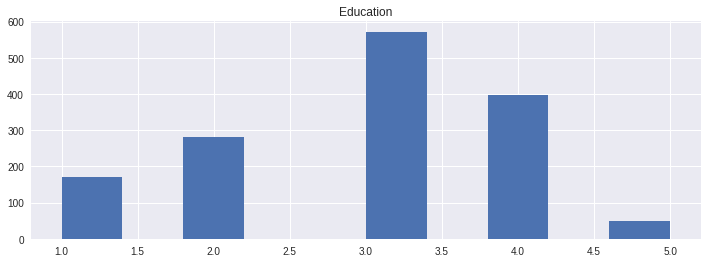

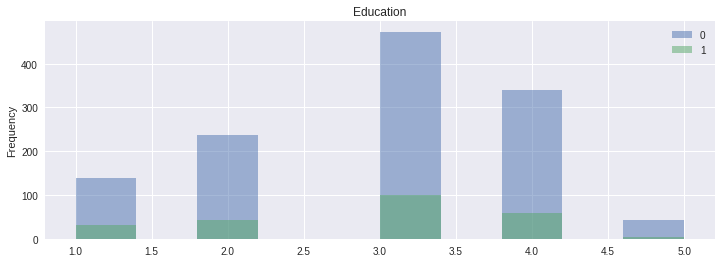

'You are about to see data from feature EnvironmentSatisfaction'

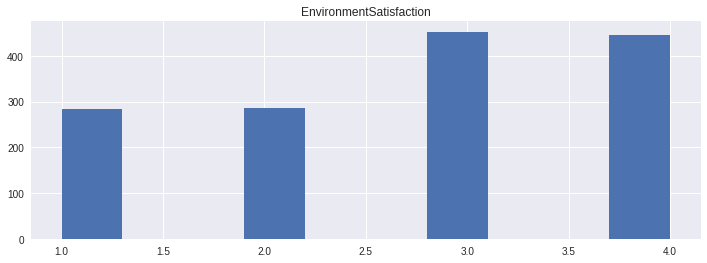

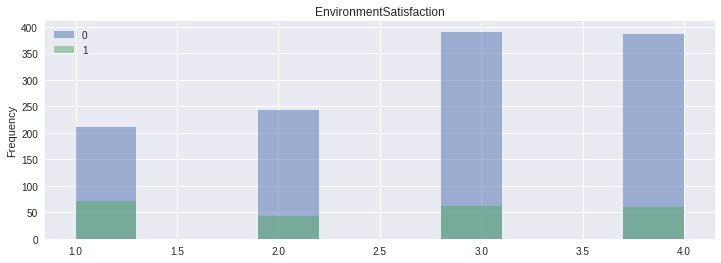

'You are about to see data from feature Gender'

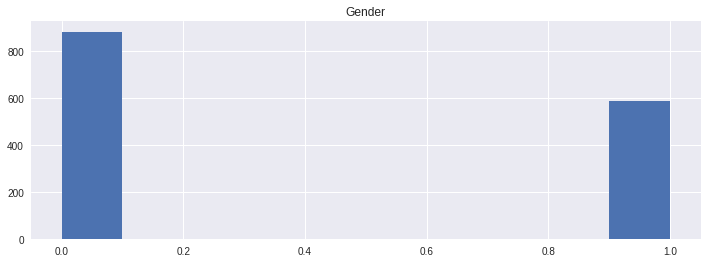

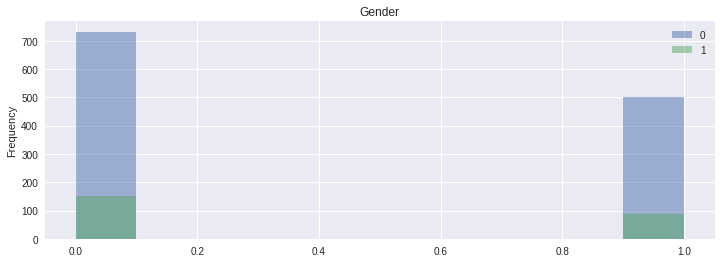

'You are about to see data from feature HourlyRate'

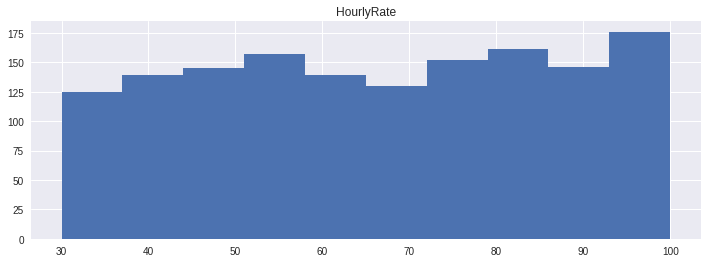

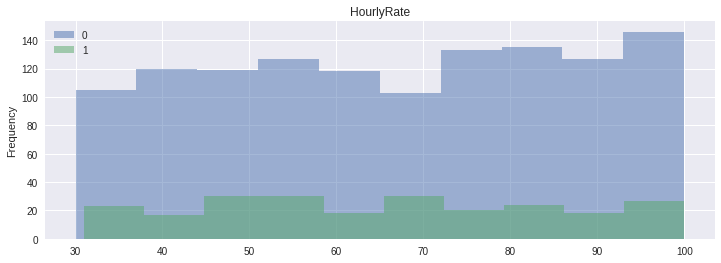

'You are about to see data from feature JobInvolvement'

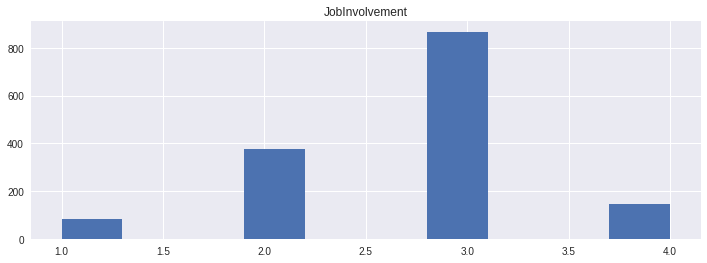

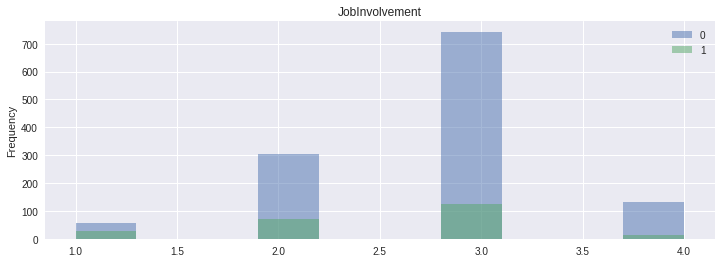

'You are about to see data from feature JobLevel'

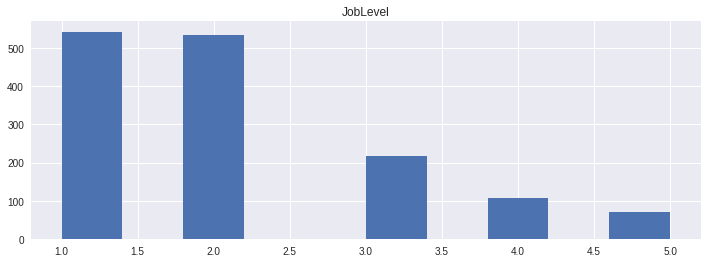

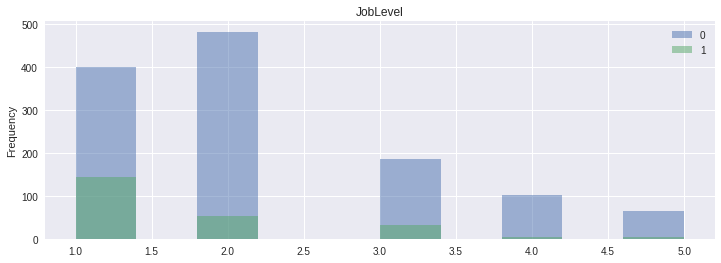

'You are about to see data from feature JobSatisfaction'

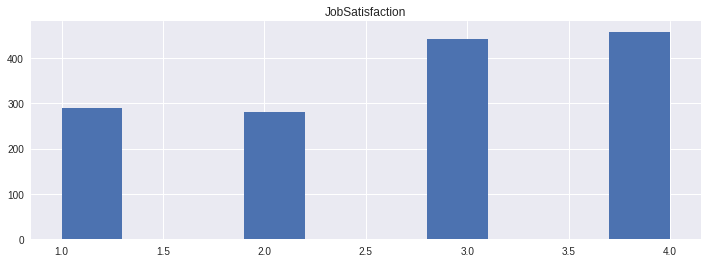

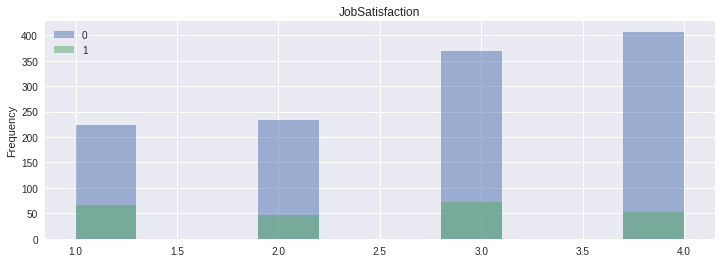

'You are about to see data from feature MonthlyIncome'

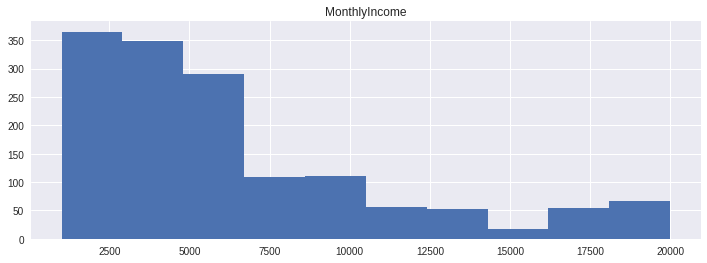

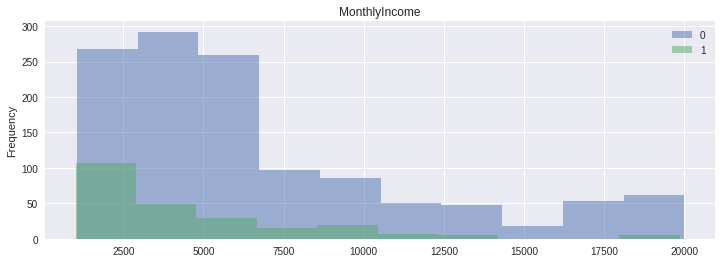

'You are about to see data from feature MonthlyRate'

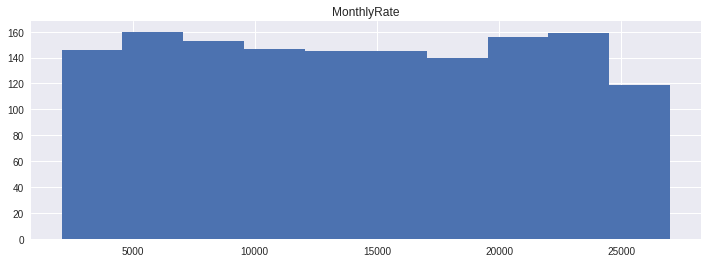

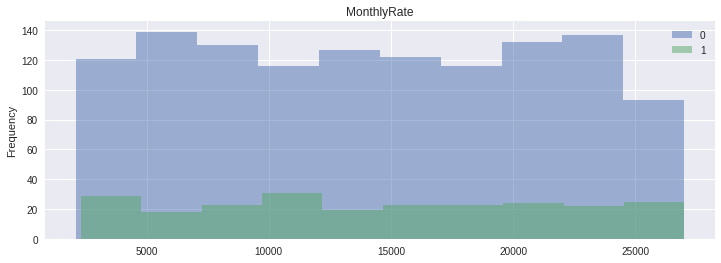

'You are about to see data from feature NumCompaniesWorked'

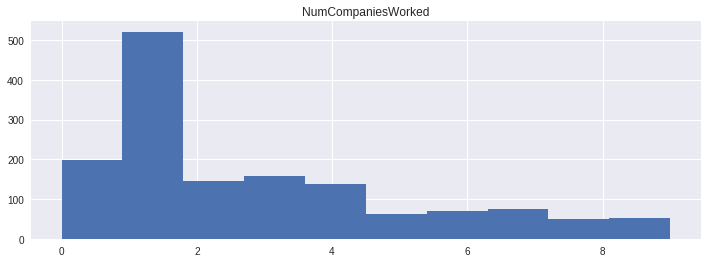

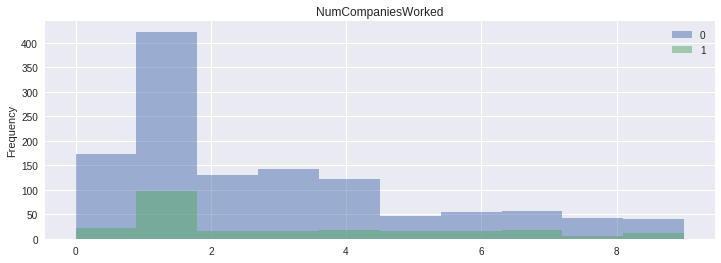

'You are about to see data from feature OverTime'

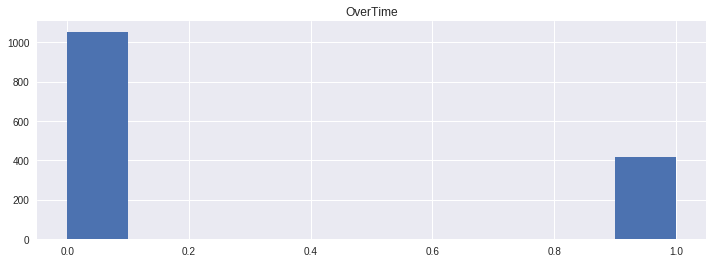

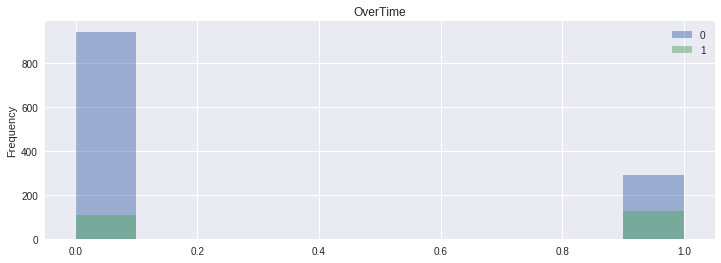

'You are about to see data from feature PercentSalaryHike'

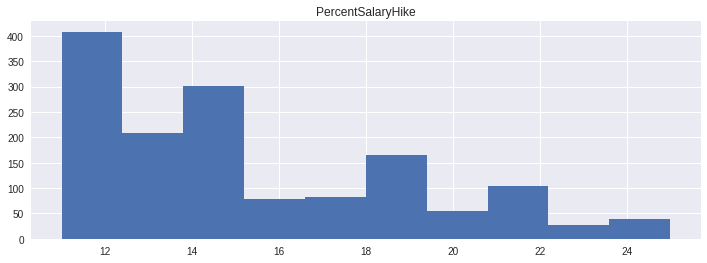

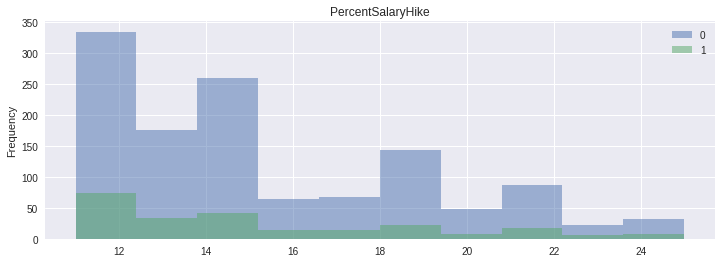

'You are about to see data from feature PerformanceRating'

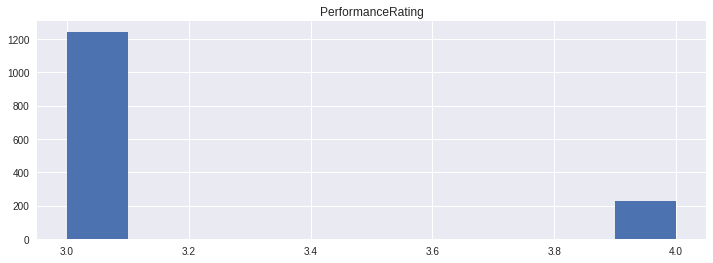

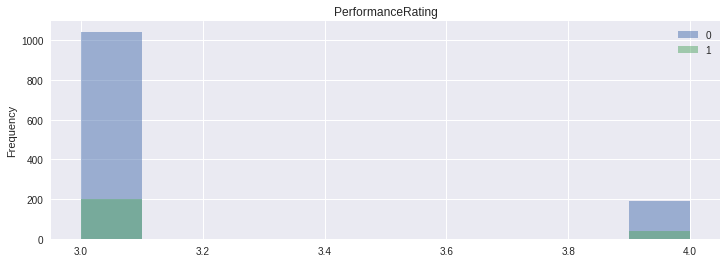

'You are about to see data from feature RelationshipSatisfaction'

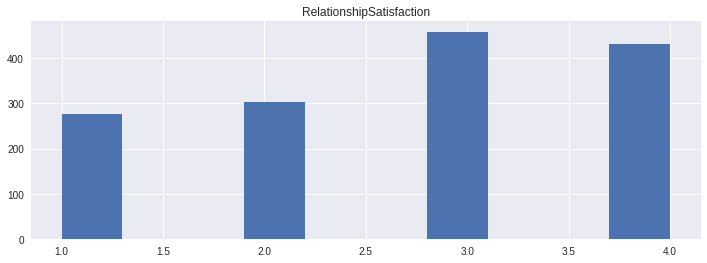

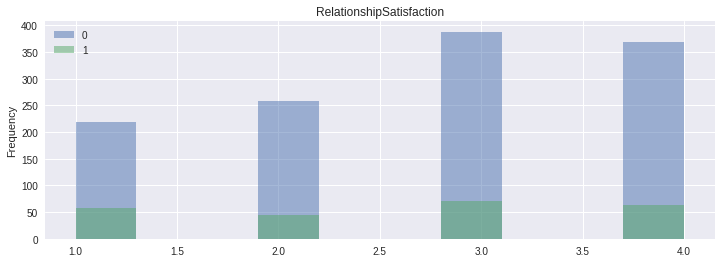

'You are about to see data from feature StockOptionLevel'

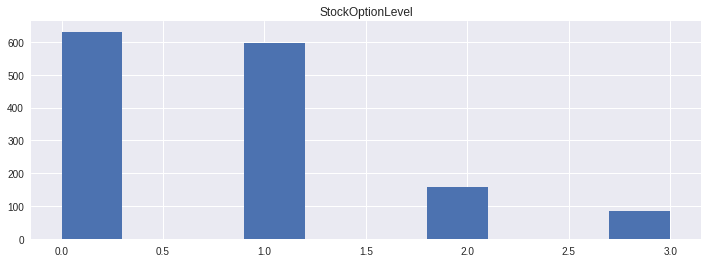

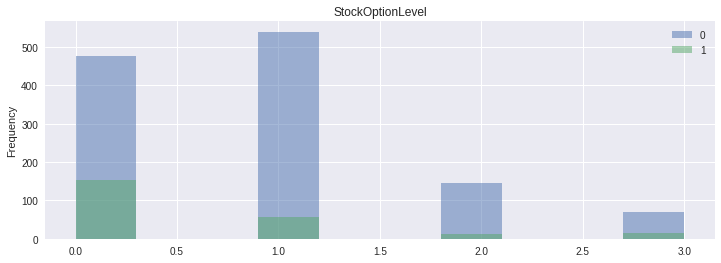

'You are about to see data from feature TotalWorkingYears'

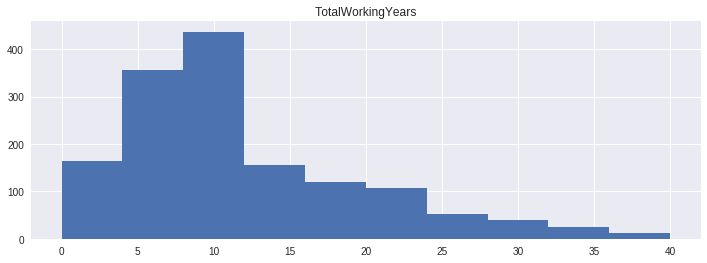

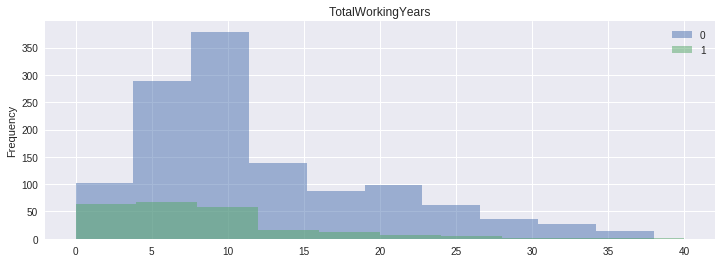

'You are about to see data from feature TrainingTimesLastYear'

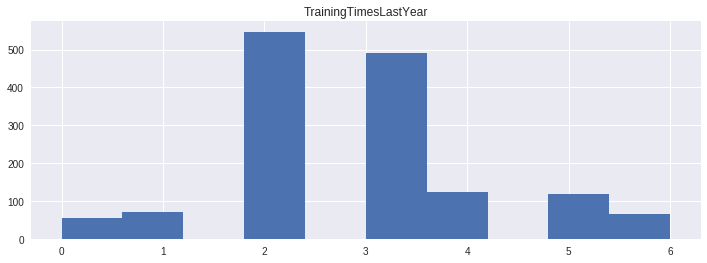

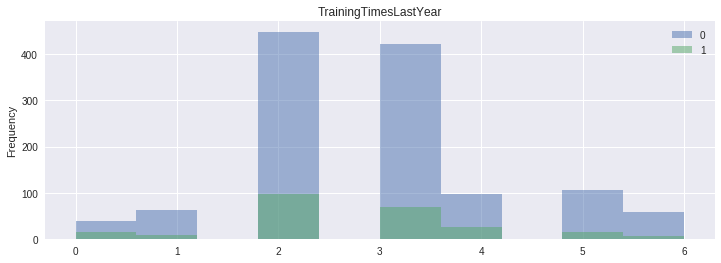

'You are about to see data from feature WorkLifeBalance'

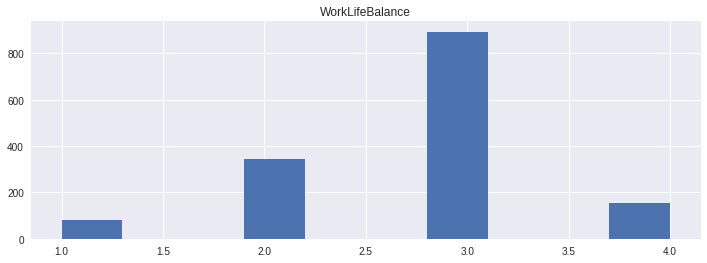

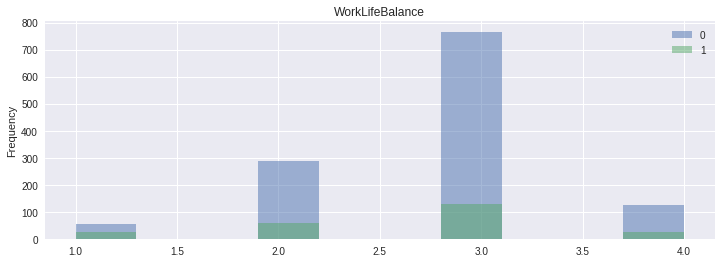

'You are about to see data from feature YearsAtCompany'

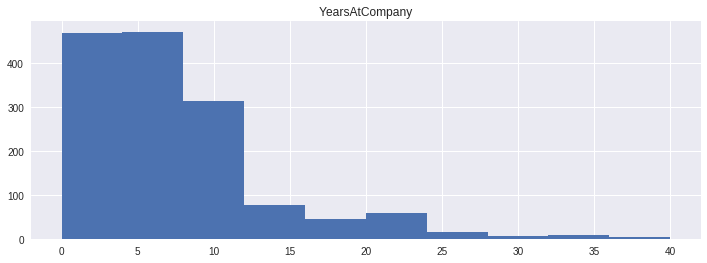

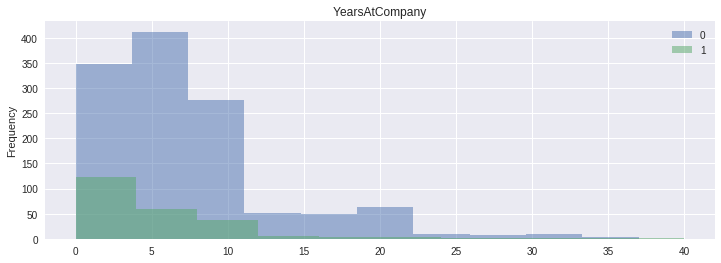

'You are about to see data from feature YearsInCurrentRole'

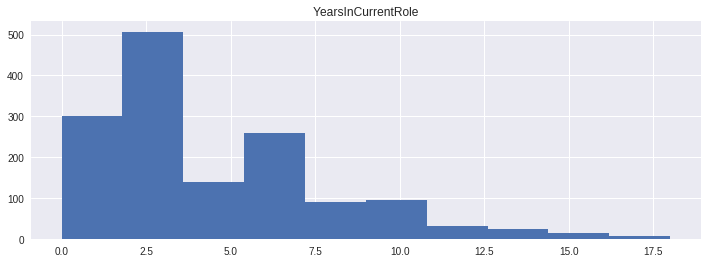

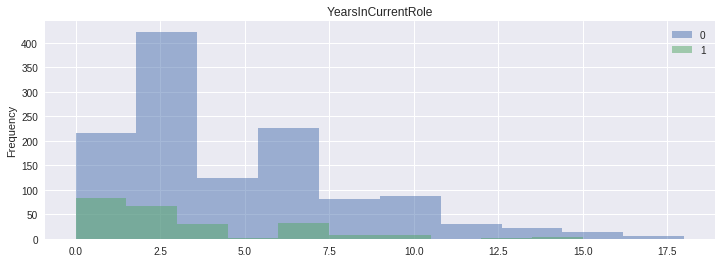

'You are about to see data from feature YearsSinceLastPromotion'

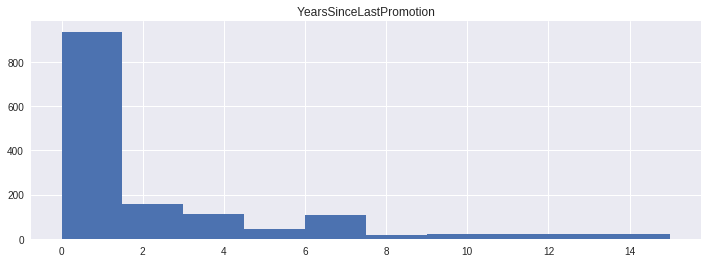

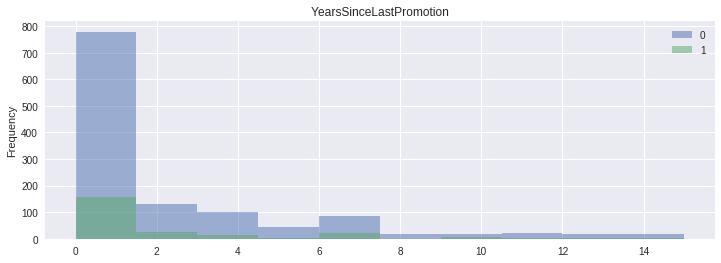

'You are about to see data from feature YearsWithCurrManager'

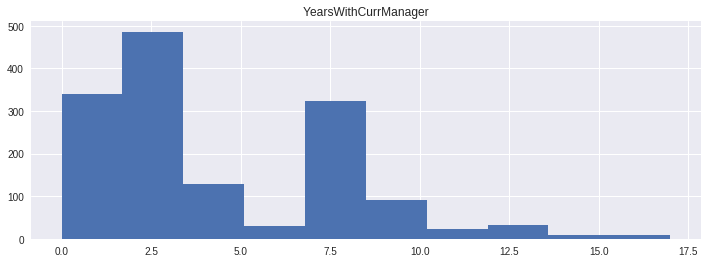

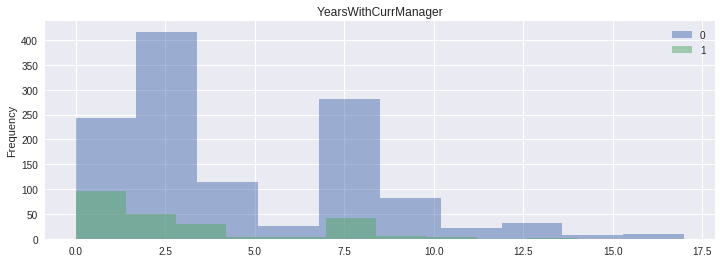

'You are about to see data from feature Non-Travel'

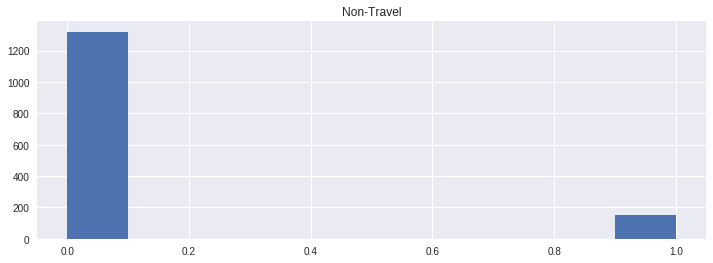

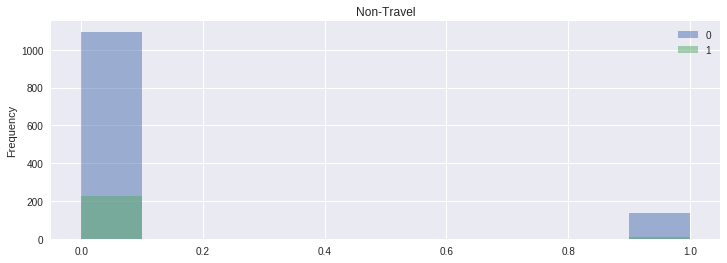

'You are about to see data from feature Travel_Frequently'

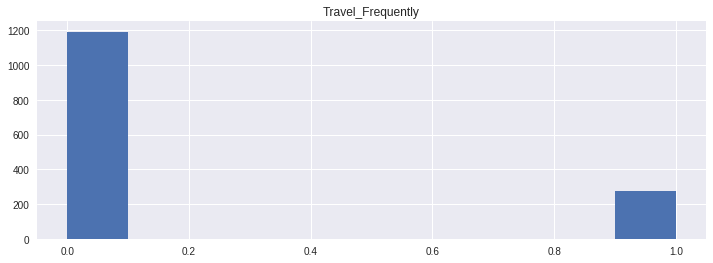

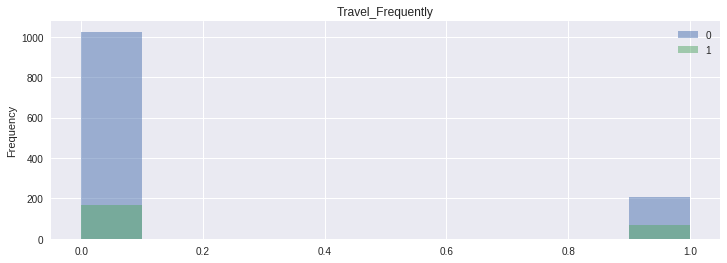

'You are about to see data from feature Travel_Rarely'

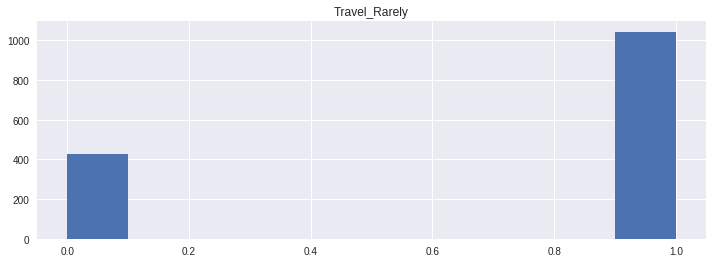

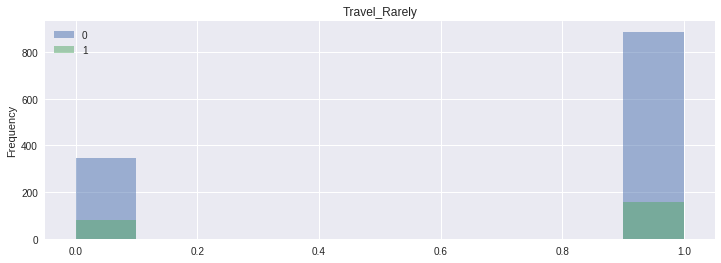

'You are about to see data from feature Research & Development'

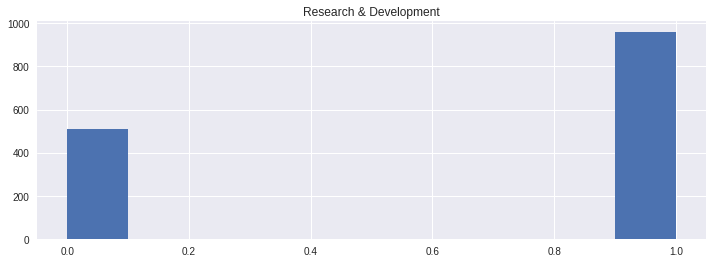

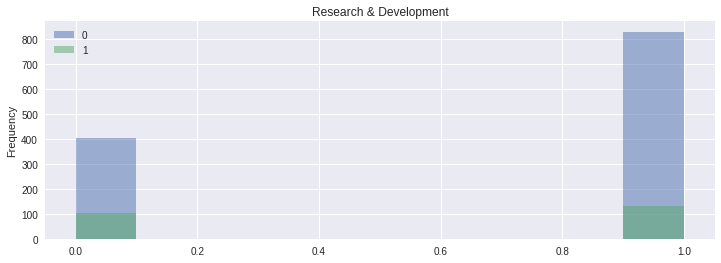

'You are about to see data from feature Sales'

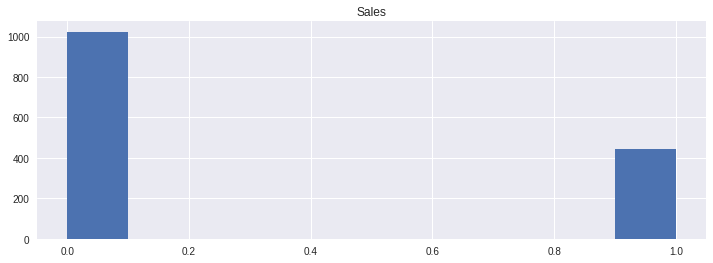

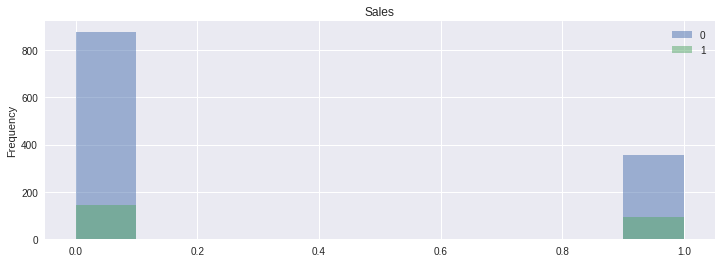

'You are about to see data from feature Healthcare Representative'

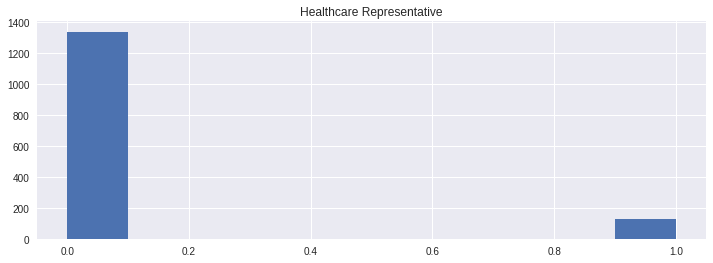

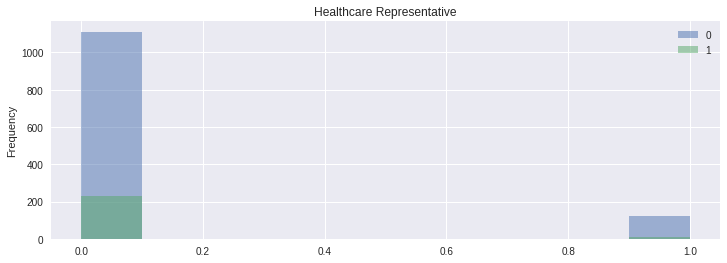

'You are about to see data from feature Laboratory Technician'

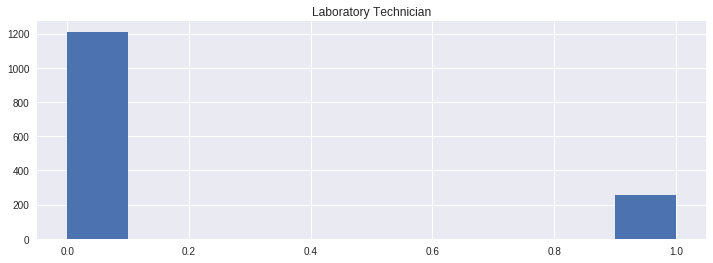

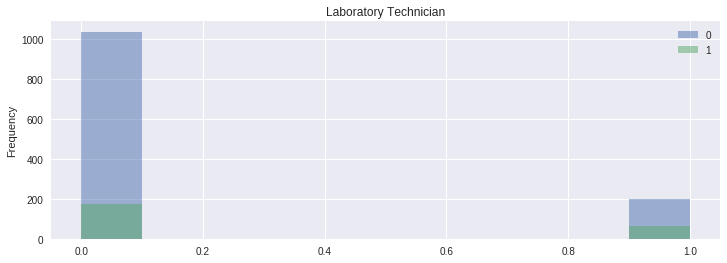

'You are about to see data from feature Manager'

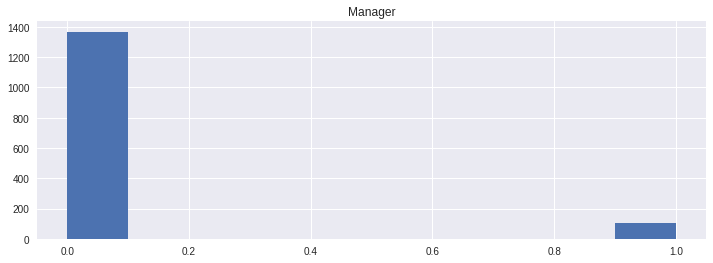

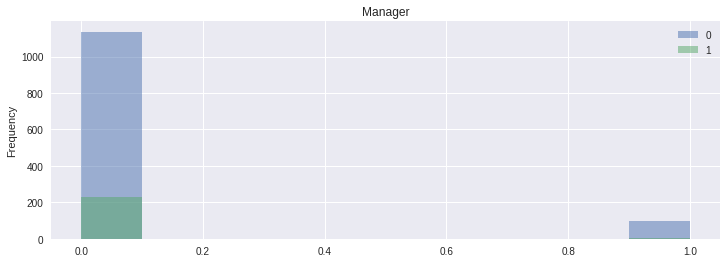

'You are about to see data from feature Manufacturing Director'

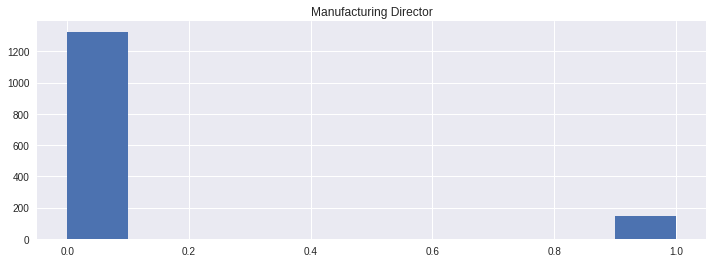

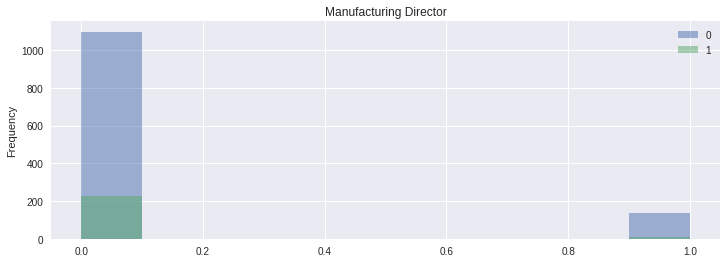

'You are about to see data from feature Research Director'

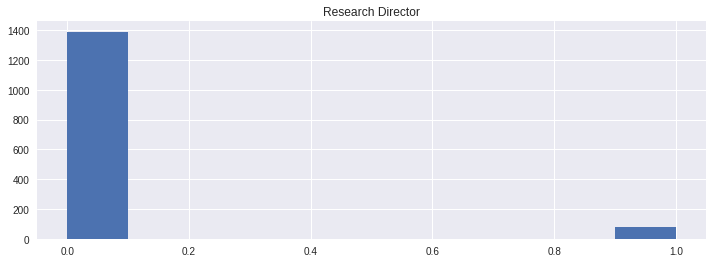

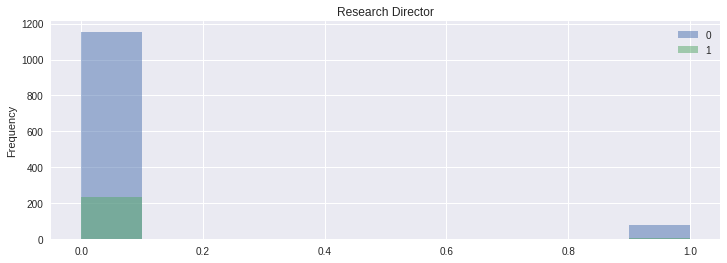

'You are about to see data from feature Research Scientist'

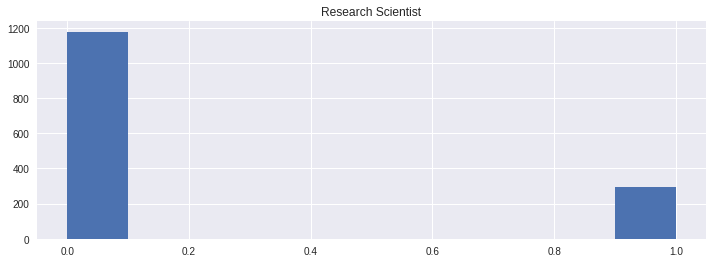

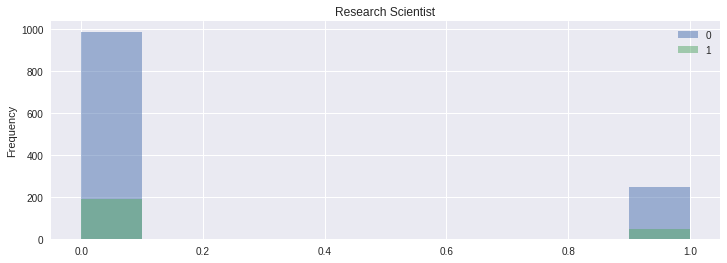

'You are about to see data from feature Sales Executive'

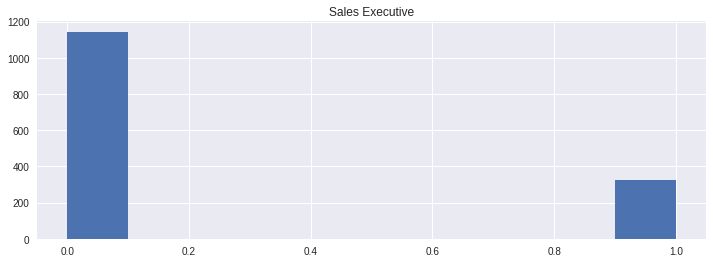

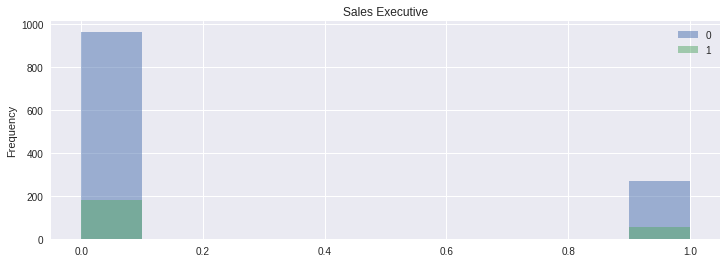

'You are about to see data from feature Sales Representative'

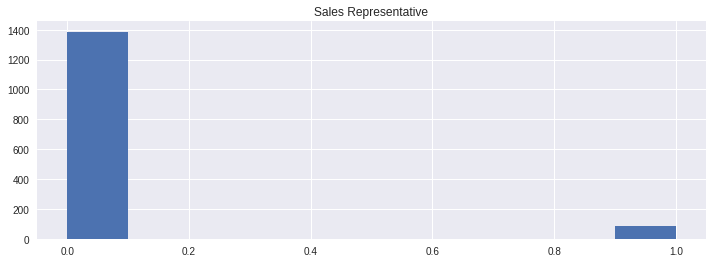

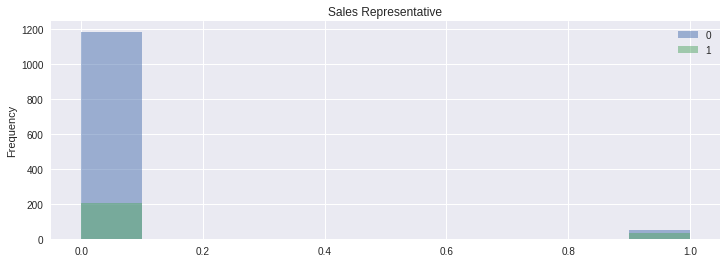

'You are about to see data from feature Divorced'

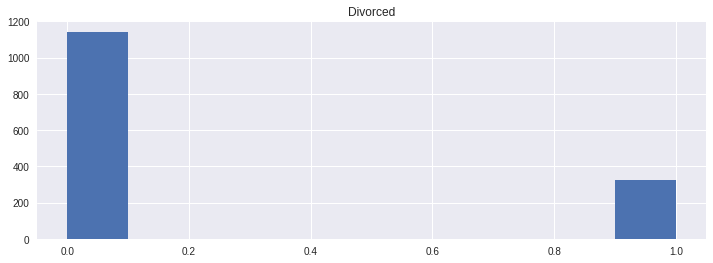

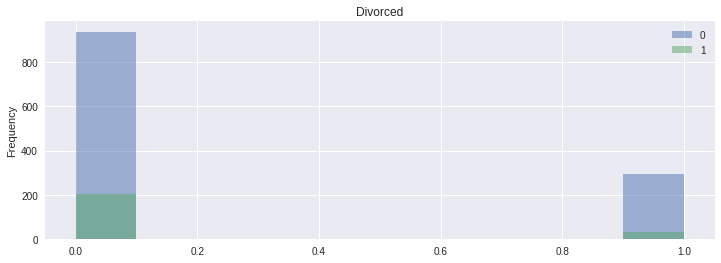

'You are about to see data from feature Married'

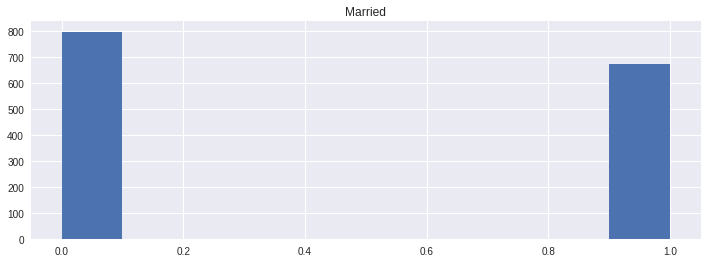

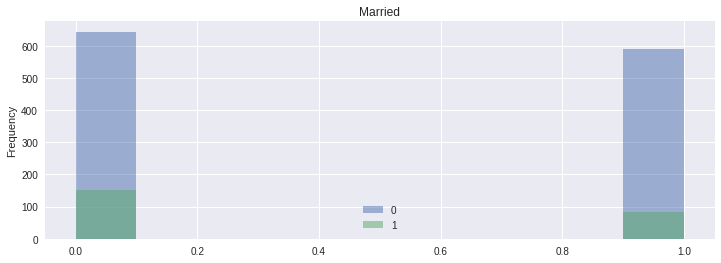

'You are about to see data from feature Single'

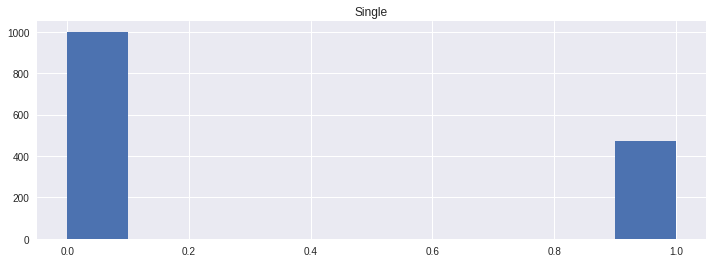

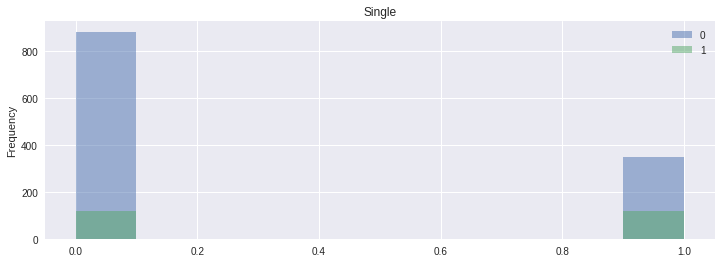

'You are about to see data from feature Life Sciences'

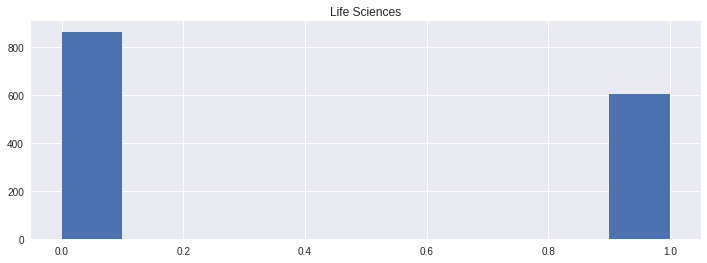

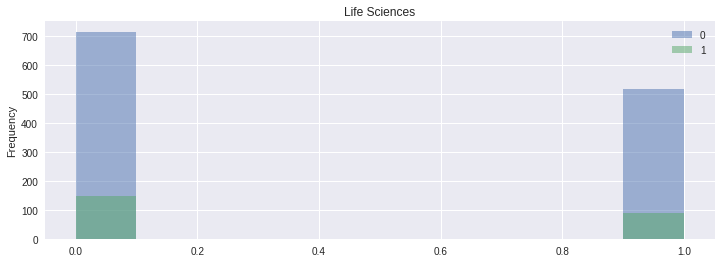

'You are about to see data from feature Marketing'

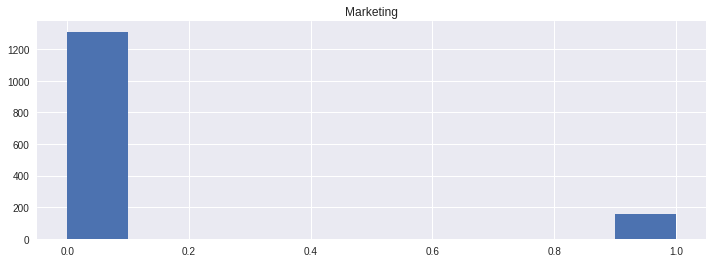

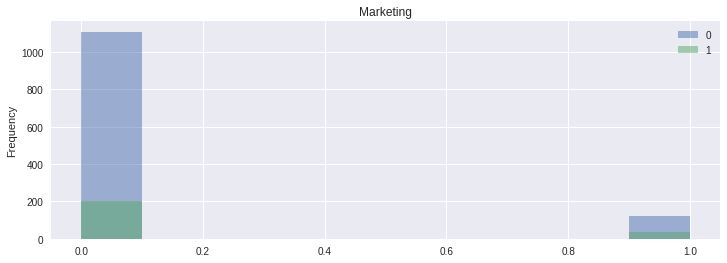

'You are about to see data from feature Medical'

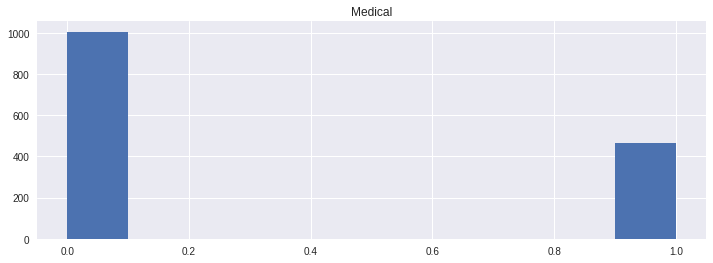

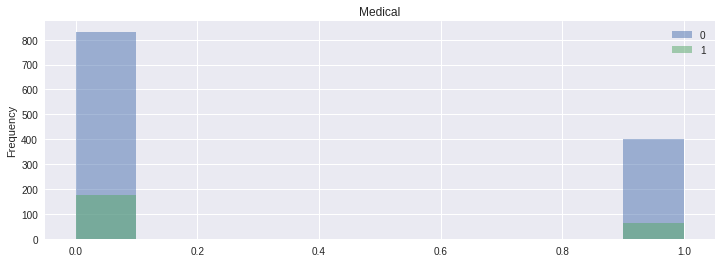

'You are about to see data from feature Other'

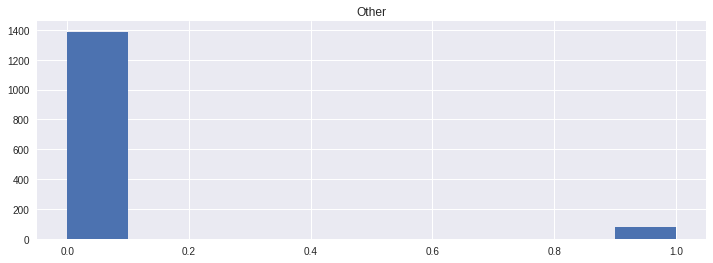

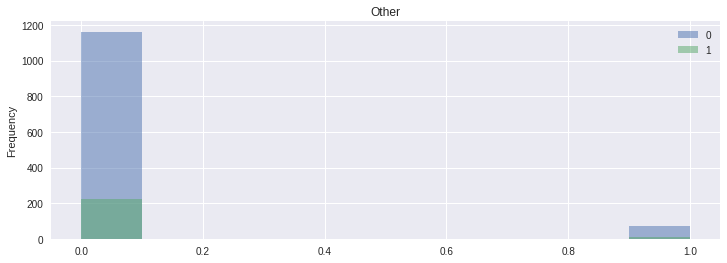

'You are about to see data from feature Technical Degree'

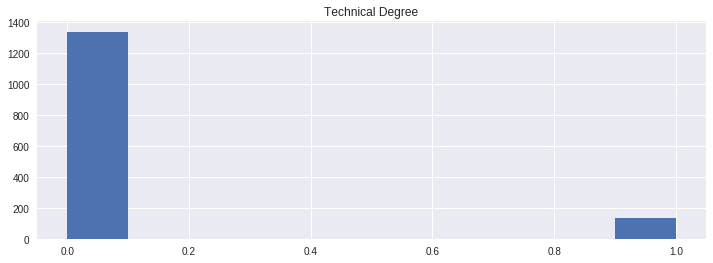

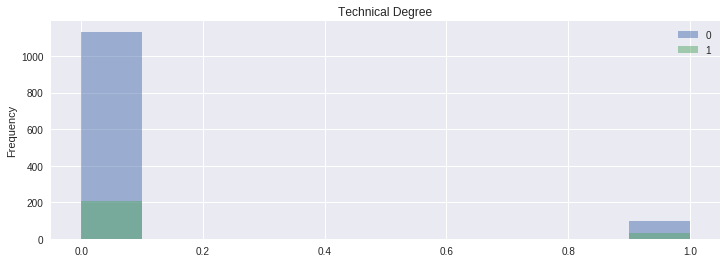

In [17]:
# Função para geração dos histogramas.
# Usando a keyword 'All', corre todas as features

def plotHist(datasetVar, columnVar):
    if columnVar == 'All':
      for i in datasetVar.columns:
        if is_numeric_dtype(datasetVar[i]):
          display('You are about to see data from feature ' + i)
          datasetVar.hist(column = i, figsize=[12,4])
          plt.show()
          df3=data[i].groupby([data['Attrition']])
          plt.ylabel('Number of Workers')
          df3.plot(kind='hist', legend = True, title = i, alpha=0.5, figsize=[12,4])
          plt.show()
    else:
        if is_numeric_dtype(datasetVar[columnVar]):
          display('You are about to see data from feature ' + columnVar)
          datasetVar.hist(column = columnVar, figsize=[12,4])
          plt.show()
          df3=data[columnVar].groupby([data['Attrition']])
          plt.ylabel('Number of Workers')
          df3.plot(kind='hist', legend = True, title = columnVar, alpha=0.5, figsize=[12,4])
          plt.show()

plotHist(data,'All') 


#NaNs e Outliers##


In [18]:
display('Existem ' + str(data.isnull().sum().sum()) + ' valores nulos no dataset')
print('\n')

'Existem 0 valores nulos no dataset'

#Matriz de Correlação

In [19]:
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.011215,-0.024743,0.028791,0.020523,0.017883,-0.027549,0.098825,-0.029856,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185,0.001696,0.016824,0.038162,-0.006354,-0.041466,-0.027604
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.074457,0.115143,-0.049538,0.016832,-0.085293,0.080855,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,0.036466,-0.032703,0.055781,-0.046999,-0.017898,0.069355
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.011716,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.012096,-0.011776,0.002078,-0.026726,0.014871,-0.003616,0.040141,-0.021156,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835,-0.043144,0.004028,-0.064449,0.034202,-0.003893,0.030869
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.023605,0.005081,-0.020116,-0.012901,-0.008117,0.014085,0.022916,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,-0.002624,-0.024499,0.039294,0.013486,-0.007969,-0.014802
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.004524,-0.008292,0.004126,0.011435,-0.018604,0.014215,0.024270,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,0.026479,0.013184,0.072405,-0.072335,0.038043,-0.026742
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.000508,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.003568,-0.012624,0.008496,-0.007597,0.027976,-0.025606,0.014090,-0.022014,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035,-0.006898,-0.024526,0.000479,-0.021299,0.064602,0.027713
Gender,0.036311,-0.029453,0.011716,0.001851,0.016547,-0.000508,1.000000,0.000478,-0.017960,0.039403,-0.033252,0.031858,0.041482,0.039147,0.041924,-0.002733,0.013859,-0.022868,-0.012716,0.046881,0.038787,0.002753,0.029747,0.041483,0.026985,0.030599,-0.050461,0.022015,0.014682,-0.035652,-0.015760,0.032017,-0.006823,-0.036082,-0.067793

#Teste de Aplicação de Algoritmos

In [22]:
#Decision Tree Classifier

y = data['Attrition']

features = list(data.columns[30:32])

x = data[features]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 5)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(x_train, y_train)
model = gsearch.best_estimator_
model.score(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8401360544217688

In [0]:
#Random Forest
